In [2]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 20.7 MB/s eta 0:00:00


In [16]:
pip install limix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.7/100.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.6

In [19]:
pip install limix.plot

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
from sklearn.metrics.pairwise import euclidean_distances
from scipy.sparse import csr_matrix
import limix
from limix.qtl import scan

In [14]:
# load in the data
genotypes = pd.read_csv('Genotypic_data_maf10_min10_291acc.txt', index_col=0)
phenotype = pd.read_csv('phenodata_BLUP_2012.txt', sep='\t', index_col='ID')

In [ ]:
print("Data preview:")
genotypes.head()


Data preview:


,IIT9210,IIT9211,IIT8604,IIT9212,IIT9213,IIT9215,IIT8613,IIT9218,IIT9219,IIT8662,...,solcap_snp_sl_31405,solcap_snp_sl_31403,SGN.U567105_snp715_solcap_snp_sl_31389,solcap_snp_sl_31373,solcap_snp_sl_6526,CL009067.0206,solcap_snp_sl_31353,solcap_snp_sl_6524,solcap_snp_sl_31342,solcap_snp_sl_31304_1
SYNAGAD_001,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SYNAGAD_002,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
SYNAGAD_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
SYNAGAD_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
SYNAGAD_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
print("Data preview:")
phenotype.head()

Data preview:


,AVVIG97,AVGROW97,FLEAR,FRDA1,FREAR,AVCFWHA,AVNCFWH,AVYTFNW
ID,,,,,,,,
SYNAGAD_001,2.707203,-8.340000e-08,6.835274,7.846930,2.264951,1.176012,1.095265,1.180196
SYNAGAD_002,0.020656,6.180000e-08,-0.261801,-3.019323,-2.585154,-0.574425,-0.347104,-0.509311
SYNAGAD_003,-1.853680,9.900000e-08,-5.838074,-3.824231,0.772611,-0.698021,-0.423512,-0.652196
SYNAGAD_004,-1.478813,1.210000e-07,-5.838074,-2.616870,1.891866,-0.832750,-0.750902,-0.856130
SYNAGAD_005,-2.103591,7.320000e-08,-6.345008,-7.178013,-1.963346,-0.903440,-0.901180,-0.917480


Calculate MAF:
To filter SNPs based on MAF, you first need to calculate the allele frequencies. You can exclude SNPs that have a MAF below a certain threshold, such as 5%. This can be done directly using pandas operations


LD Pruning:
To reduce redundancy due to linkage disequilibrium, you can prune the SNPs further. This step typically requires specialized software like PLINK, but you can approximate this in Python by calculating correlation coefficients and removing one SNP of each highly correlated pair.

In [ ]:
def calculate_maf(df):
    # Calculate minor allele frequency
    maf = df.apply(lambda x: min(x.mean(), 1-x.mean()), axis=0)
    return maf

def ld_pruning(df, threshold=0.5):
    # Calculate correlation matrix
    corr = df.corr()
    # Identify pairs of SNPs with correlation greater than the threshold
    # Avoid double removal and self-comparison (i.e., diagonal elements)
    to_remove = set()
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i, j] > threshold:
                to_remove.add(corr.columns[j])
    return df.drop(columns=to_remove)


In [ ]:
# Filter SNPs by MAF and LD
maf = calculate_maf(genotypes)
genotypes_filtered = genotypes.loc[:, maf >= 0.01] # Filter out SNPs with MAF less than 1%
genotypes_pruned = ld_pruning(genotypes_filtered)

In [ ]:
genotypes_pruned

,IIT9210,IIT8604,IIT9215,IIT8613,IIT9218,IIT8662,IIT12529,IIT12147,IIT11292,IIT12930,...,solcap_snp_sl_33666,solcap_snp_sl_22748,solcap_snp_sl_31275,solcap_snp_sl_7046,solcap_snp_sl_14428,solcap_snp_sl_19630,solcap_snp_sl_19632,solcap_snp_sl_31975,solcap_snp_sl_25007,solcap_snp_sl_6556
SYNAGAD_001,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
SYNAGAD_002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
SYNAGAD_003,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
SYNAGAD_004,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
SYNAGAD_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYNAGAD_290,0.5,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SYNAGAD_291,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
SYNAGAD_292,0.0,0.5,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.0,0.5,0.0
SYNAGAD_293,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# 'genotypes' and 'phenotype' are already loaded and aligned by their indices
# now we check for missing data
imputer = SimpleImputer(strategy='median')
genotypes_imputed = pd.DataFrame(imputer.fit_transform(genotypes_pruned), columns=genotypes_pruned.columns)
phenotype_imputed = pd.DataFrame(imputer.fit_transform(phenotype), columns=phenotype.columns)

# Scale the data
scaler = StandardScaler()
genotypes_scaled = pd.DataFrame(scaler.fit_transform(genotypes_imputed), columns=genotypes_pruned.columns)

# Check for any remaining NaNs or infinities
genotypes_scaled = genotypes_scaled.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
phenotype_scaled = pd.DataFrame(scaler.fit_transform(phenotype_imputed), columns=phenotype.columns)

In [ ]:
# Save to CSV
genotypes_scaled.to_csv('genotypes_scaled.csv', index=True)
# Save to TXT with tab delimiter (effectively TSV)
genotypes_scaled.to_csv('genotypes_scaled.txt', sep='\t', index=True)


In [10]:
genotypes_scaled = pd.read_csv('genotypes_scaled.txt', sep='\t', index_col=0)

In [12]:
genotypes_scaled.head()

,IIT9210,IIT8604,IIT9215,IIT8613,IIT9218,IIT8662,IIT12529,IIT12147,IIT11292,IIT12930,...,solcap_snp_sl_33666,solcap_snp_sl_22748,solcap_snp_sl_31275,solcap_snp_sl_7046,solcap_snp_sl_14428,solcap_snp_sl_19630,solcap_snp_sl_19632,solcap_snp_sl_31975,solcap_snp_sl_25007,solcap_snp_sl_6556
0,2.229530,-0.53497,1.060278,-0.39052,-0.75003,1.512674,-0.866343,-0.615768,-0.617288,-0.757455,...,-0.455602,-0.365839,-0.618558,-0.424918,1.833155,1.111846,-0.574747,-0.422253,1.689629,-0.5138
1,2.229530,-0.53497,1.060278,-0.39052,-0.75003,-0.666475,-0.866343,-0.615768,-0.617288,-0.757455,...,-0.455602,-0.365839,-0.618558,-0.424918,-0.564365,1.111846,1.764433,2.611714,1.689629,-0.5138
2,-0.468155,-0.53497,-0.956329,-0.39052,-0.75003,-0.666475,0.192925,-0.615768,-0.617288,-0.757455,...,-0.455602,-0.365839,-0.618558,-0.424918,-0.564365,1.111846,-0.574747,-0.422253,-0.607951,-0.5138
3,-0.468155,-0.53497,-0.956329,-0.39052,-0.75003,-0.666475,0.192925,0.570910,-0.617288,0.312542,...,-0.455602,-0.365839,-0.618558,-0.424918,-0.564365,-0.955548,-0.574747,2.611714,-0.607951,-0.5138
4,-0.468155,-0.53497,-0.956329,-0.39052,-0.75003,-0.666475,-0.866343,-0.615768,-0.617288,1.382540,...,-0.455602,-0.365839,-0.618558,-0.424918,-0.564365,-0.955548,-0.574747,2.611714,-0.607951,-0.5138


In [ ]:
genotypes_scaled.head()

,IIT9210,IIT8604,IIT9215,IIT8613,IIT9218,IIT8662,IIT12529,IIT12147,IIT11292,IIT12930,...,solcap_snp_sl_33666,solcap_snp_sl_22748,solcap_snp_sl_31275,solcap_snp_sl_7046,solcap_snp_sl_14428,solcap_snp_sl_19630,solcap_snp_sl_19632,solcap_snp_sl_31975,solcap_snp_sl_25007,solcap_snp_sl_6556
0,2.229530,-0.53497,1.060278,-0.39052,-0.75003,1.512674,-0.866343,-0.615768,-0.617288,-0.757455,...,-0.455602,-0.365839,-0.618558,-0.424918,1.833155,1.111846,-0.574747,-0.422253,1.689629,-0.5138
1,2.229530,-0.53497,1.060278,-0.39052,-0.75003,-0.666475,-0.866343,-0.615768,-0.617288,-0.757455,...,-0.455602,-0.365839,-0.618558,-0.424918,-0.564365,1.111846,1.764433,2.611714,1.689629,-0.5138
2,-0.468155,-0.53497,-0.956329,-0.39052,-0.75003,-0.666475,0.192925,-0.615768,-0.617288,-0.757455,...,-0.455602,-0.365839,-0.618558,-0.424918,-0.564365,1.111846,-0.574747,-0.422253,-0.607951,-0.5138
3,-0.468155,-0.53497,-0.956329,-0.39052,-0.75003,-0.666475,0.192925,0.570910,-0.617288,0.312542,...,-0.455602,-0.365839,-0.618558,-0.424918,-0.564365,-0.955548,-0.574747,2.611714,-0.607951,-0.5138
4,-0.468155,-0.53497,-0.956329,-0.39052,-0.75003,-0.666475,-0.866343,-0.615768,-0.617288,1.382540,...,-0.455602,-0.365839,-0.618558,-0.424918,-0.564365,-0.955548,-0.574747,2.611714,-0.607951,-0.5138


In [ ]:
phenotype_scaled.head()

,AVVIG97,AVGROW97,FLEAR,FRDA1,FREAR,AVCFWHA,AVNCFWH,AVYTFNW
0,1.608862,-1.241663,1.509307,1.553127,0.852062,1.930903,1.846739,1.929939
1,-0.015832,0.953858,-0.085743,-0.636010,-1.004047,-1.001716,-0.635264,-0.889357
2,-1.149340,1.516346,-1.338996,-0.798168,0.280952,-1.208785,-0.766745,-1.127791
3,-0.922638,1.849001,-1.338996,-0.554931,0.709285,-1.434505,-1.330111,-1.468098
4,-1.300474,1.126233,-1.452928,-1.473827,-0.766085,-1.552936,-1.588706,-1.570473


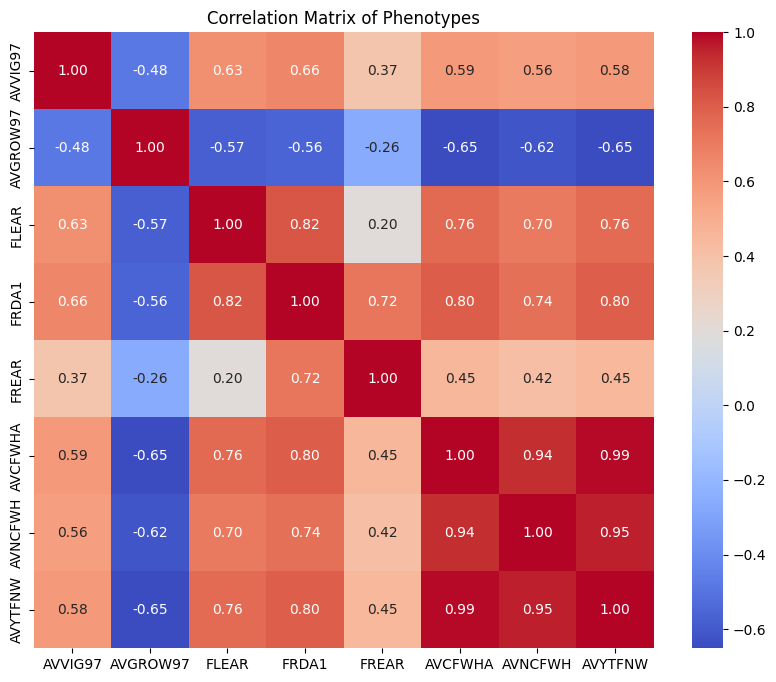

In [ ]:
# Assuming 'phenotypes' is your DataFrame containing the phenotype data
correlation_matrix = phenotype_scaled.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Phenotypes')
plt.show()

##### AVGROW97 (plant growth (plant stem elongation between 90 and 97 days after sowing: GROW97)) seems to have consistently moderate negative correlations with most other traits. This could make it interesting if we are looking for unique genetic factors that specifically influence growth, independent of other factors.

In [ ]:
# Extract the AVGROW97 column from the phenotype dataframe
# Extract the target variable
y = phenotype_scaled['AVGROW97'].values
# Construct X from the genotype dataframe
X = genotypes_scaled

# Determine the number of samples (rows) and features (columns)
num_samples, num_features = X.shape

print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

Number of samples: 291
Number of features: 243


### now after preprocessing the data we want to access the genetic structure and calculate the kinship matrix

##### Principal Component Analysis (PCA) to Assess Genetic Structure

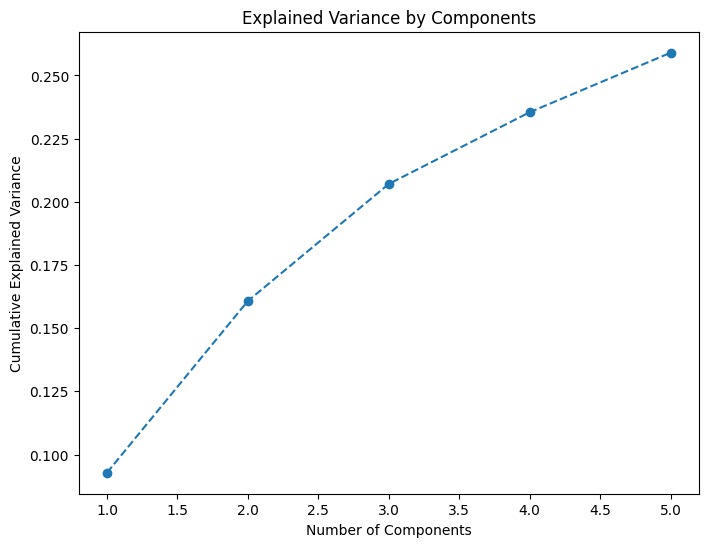

In [ ]:
# Perform PCA on the genotype data
pca = PCA(n_components=5)
principal_components = pca.fit_transform(genotypes_scaled)

# Plot the variance explained by each principal component
plt.figure(figsize=(8, 6))
# Adjust the x-range to match the number of PCA components
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### Select the number of components to use based on the PCA results


In [ ]:
# Select components that explain at least 80% of the variance
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)
num_components = np.where(cum_var_explained > 0.8)[0][0] + 1 if np.any(cum_var_explained > 0.8) else len(cum_var_explained)
pca_selected = principal_components[:, :num_components]


### Kinship Matrix Calculation

In [ ]:
# Calculate the kinship matrix from PCA components
distances = euclidean_distances(principal_components)
# Threshold distances to create a sparser kinship matrix
threshold_distance = np.percentile(distances, 50)  # Keep distances below the 50th percentile
kinship_matrix = np.where(distances < threshold_distance, 1 - distances / np.max(distances), 0)
# If the exog_re (kinship matrix) can be made sparse,
# it might reduce memory usage significantly.
# Convert the kinship matrix to a sparse matrix
kinship_matrix_sparse = csr_matrix(kinship_matrix)


In [ ]:
# Prepare X matrix with PCA components
X_with_pca = np.hstack((genotypes_scaled.values, pca_selected))

### Conduct GWAS

Instead of fitting the model for all SNPs at once, consider breaking the dataset into smaller batches and processing each separately.

In [ ]:
result = scan(y, X_with_pca, kinship=kinship_matrix_sparse)

In [ ]:
# Create a DataFrame for results if necessary
# Assuming 'result' has a 'pv' field for p-values
df = pd.DataFrame({
    'p_value': result['pv'],
    # Add positional data accordingly
    'position': np.arange(len(result['pv'])),
    'chromosome': np.ceil(np.linspace(1, 12, num=len(result['pv'])))
})

# Create Manhattan plot manually
df['-log10(p_value)'] = -np.log10(df['p_value'])
df['color'] = df['chromosome'] % 2

plt.figure(figsize=(10, 5))
for key, grp in df.groupby(['color']):
    plt.scatter(grp['position'], grp['-log10(p_value)'], c=['red' if key == 1 else 'blue'])
plt.xlabel('Position')
plt.ylabel('-Log10(P-value)')
plt.title('Manhattan Plot')
plt.grid(True)
plt.show()

# Create QQ plot manually
observed = -np.log10(df['p_value'])
expected = -np.log10(np.linspace(1/len(df), 1, num=len(df)))
plt.scatter(expected, observed)
plt.plot([min(expected), max(expected)], [min(expected), max(expected)], ls="--", c="red")
plt.xlabel('Expected -log10(P-value)')
plt.ylabel('Observed -log10(P-value)')
plt.title('QQ Plot')
plt.grid(True)
plt.show()

# Output the summary of results
print(result)

In [ ]:
# Add a constant to the genotype data for the intercept
X_with_const = sm.add_constant(genotypes_scaled)  # Adds an intercept term to the predictors

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(pca_selected, columns=[f'PC_{i}' for i in range(pca_selected.shape[1])])

# Concatenate the PCA components with the genotype data
covariates = pd.concat([X_with_const, pca_df], axis=1)

# Check for NaN values in the covariates or the response
if covariates.isnull().any().any():
    raise ValueError("Covariates DataFrame contains NaN values")
if np.any(pd.isnull(y)):
    raise ValueError("y contains NaN or infinite values")

# Ensure the kinship matrix is correctly sized and formatted
kinship_matrix_shape = kinship_matrix.shape
if kinship_matrix_shape[0] != kinship_matrix_shape[1] or kinship_matrix_shape[0] != len(y):
    raise ValueError("Kinship matrix dimensions mismatch or do not match the number of observations in y")

# Create a model instance using all SNPs
groups = pd.Series(np.ones(len(y)))  # Assuming only one group for simplicity
model = MixedLM(y, covariates, groups=groups, exog_re=kinship_matrix)
result = model.fit(method='cg')

# Store and print the summary of the results
print(result.summary())


MemoryError: Unable to allocate 13.6 GiB for an array with shape (42735, 42735) and data type float64

#### Result Analysis and Visualization

In [ ]:
# After computing the p-values for each SNP,
# analyze and visualize the results to identify significant associations.
# Convert p-values to a numpy array for easy handling
p_values = result.pvalues
p_values_array = np.array(p_values)

# Plotting the GWAS results: Manhattan Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(p_values_array)), -np.log10(p_values_array), c='b', alpha=0.5, marker='o')
plt.axhline(-np.log10(0.05 / genotypes_scaled.shape[1]), color='r', linestyle='--')  # Bonferroni correction
plt.xlabel('SNP Index')
plt.ylabel('-log10(p-value)')
plt.title('GWAS Manhattan Plot')
plt.show()


### load these features back into a Python session for analysis, we can use numpy.loadtxt():

In [ ]:
selected_features_lasso = np.loadtxt("selected_features_lasso.txt", dtype=int)
selected_features_enet = np.loadtxt("selected_features_enet.txt", dtype=int)
selected_features_svm = np.loadtxt("selected_features_svm.txt", dtype=int)
selected_features_rf = np.loadtxt("selected_features_rf.txt", dtype=int)
selected_features_rfe = np.loadtxt("selected_features_rfe.txt", dtype=int)
selected_features_gbm = np.loadtxt("selected_features_gbm.txt", dtype=int)
selected_features_xgb = np.loadtxt("selected_features_xgb.txt", dtype=int)